<a href="https://colab.research.google.com/github/jagorn/NMA2020_group_project/blob/master/ExtractSnippets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Setup



In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import sparse
import os.path
from os import path
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load data

In [77]:
# Load data
drivepath = 'drive/My Drive/NMA project/Cori_2016-12-14/'
spiketimes = np.load(drivepath + 'spikes.times.npy')
clusters = np.load(drivepath + 'spikes.clusters.npy')
trial_intervals = np.load(drivepath + 'trials.intervals.npy')
included_trials = np.load(drivepath + 'trials.included.npy')


In [ ]:
def sort_and_clean():
    """
    Returns a dict where keys -> brain areas and values -> list of neurons.
    Neurons with bad quality scores (less than 2) are exluded.
    """
    # Create a list where index -> neuron and value -> area:
    matched = [areas_from_channels[int(c)] for c in channels]
    # Find the indices (aka neurons) where they have a score < 2:
    bad_indices = [i for i, score in enumerate(quality) if score[0] < 2]
    # Create a dictionary to sort neurons according to areas:
    d = {}
    for index, area in enumerate(matched): # Iterate index and value together
        # Discard bad recordings:
        if index not in bad_indices:
            # If the area is already a key then append this neuron index
            if area in d.keys():
                d[area].append(index)
            # Else create a new key for a single element list
            else:
                d[area] = [index]
    return d

# Remove discarded trials


In [69]:
def clean_trials (trial_intervals, included_trials):
#   Remove trials that were not included
#   INPUT: trial_intervals  - onset and offset timestamps of a N trials
#          included_trials - boolean +1 included, 0 not included
#
  idx = np.where(included_trials == 1 )
  idx = idx[0]
  return trial_intervals[idx,:]



In [114]:
clean_trial_intervals = clean_trials(trial_intervals, included_trials)
print ('Shape before cleaning:',trial_intervals.shape)
print ('Shape after cleaning:',clean_trial_intervals.shape)



Shape before cleaning: (214, 2)
Shape after cleaning: (201, 2)


# Extract spike snippets during trials

In [174]:
def extract_snippets_spikes (trial_intervals, spiketimes, clusters):
#   Extract spiketimes and unit id (clusters) occured within the trial window.
#   INPUT : trial_intervals  - onset and offset timestamps of a N trials, use cleaned version
#           spiketimes - a vector containing spike times
#            clusters - unit/neuron id for a given spike, same shape as spiketimes
#       
#  OUTPUT: snippets  - spiketimes and unit id during trials. List size of N trials each containing n x 2 array (spiketimes, unit id)

  TrialNum = trial_intervals.shape[0]

  # Initialize
  snippets = []
  for trial in range(0,TrialNum):
    spikes = [];
    # Onset and offset of a trial
    onset = trial_intervals[trial,0]
    offset = trial_intervals[trial,1]
    
    # Spikes between trial onset and offset
    idx = np.where((spiketimes >= onset) & (spiketimes < offset))
    idx = idx[0] # only the indices
    spikes= spiketimes[idx]
    spikes = np.concatenate((spikes,clusters[idx]), axis=1) #concatenate corresponding unit id
    
    snippets.append(spikes);
    

  return snippets

In [175]:
snippets = extract_snippets_spikes (clean_trial_intervals, spiketimes, clusters)

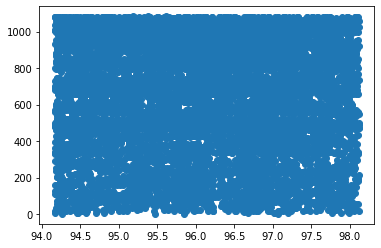

In [192]:
# Raster plot from a trial
trialnum = 6
plt.plot(snippets[trialnum][:,0], snippets[trialnum][:,1], 'o')
